<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> Transfer Learning</h1>

In [1]:
from tensorflow import keras
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

conv_base = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(160, 160, 3))

In [2]:
conv_base.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator()
base_dir = 'G:/dataset/FPC'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

This is what our model looks like now:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 256)               8192256   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 10,451,011
Trainable params: 10,416,899
Non-trainable params: 34,112
_________________________________________________________________


In [6]:
conv_base.trainable = False

In [32]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(160,160),
        batch_size=64,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(160, 160),
        batch_size=64,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-6),
              metrics=['acc'])


Found 3600 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


In [34]:
history = model.fit(
      train_generator,
      batch_size = 64,
      epochs=5,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/5
57/57 - 57s - loss: 0.0092 - acc: 0.9972 - val_loss: 0.0900 - val_acc: 0.9767 - 57s/epoch - 1s/step
Epoch 2/5
57/57 - 62s - loss: 0.0062 - acc: 0.9978 - val_loss: 0.0910 - val_acc: 0.9808 - 62s/epoch - 1s/step
Epoch 3/5
57/57 - 67s - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0922 - val_acc: 0.9808 - 67s/epoch - 1s/step
Epoch 4/5
57/57 - 64s - loss: 0.0108 - acc: 0.9964 - val_loss: 0.0924 - val_acc: 0.9792 - 64s/epoch - 1s/step
Epoch 5/5
57/57 - 67s - loss: 0.0087 - acc: 0.9967 - val_loss: 0.0942 - val_acc: 0.9808 - 67s/epoch - 1s/step


In [35]:
model.save('F:\\tranferlearning\Model2')

INFO:tensorflow:Assets written to: F:\tranferlearning\Model2\assets


INFO:tensorflow:Assets written to: F:\tranferlearning\Model2\assets


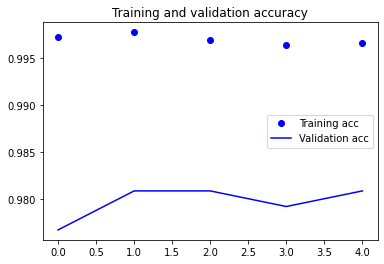

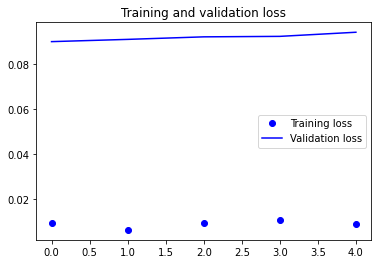

In [36]:
from matplotlib import pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

predict a picture for test:

In [37]:
def classname(x):
    if x==0:
        return 'car'
    elif x==1:
        return 'fish'
    else:
        return 'pigeon'

As you can see, we reach a validation accuracy of about 96%. This is much better than our small convnet trained from scratch.

In [40]:
from keras.preprocessing import image
img_path = 'G:\\Car2.jpg'
img = image.load_img(img_path, target_size=(160, 160))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

x.shape

(1, 160, 160, 3)

In [41]:
preds = model.predict(x)
classname(np.argmax(preds))

'car'

Confusion Matrix for valiadtion:

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(validation_generator)
y_pred = [1 * (x[0]>=0.5) for x in Y_pred]
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[286 114   0]
 [248 152   0]
 [264 136   0]]


In [43]:
print('Classification Report')
target_names = ['Car', 'Fish', 'Pigeon']
print(classification_report(validation_generator.classes, y_pred, 
target_names=target_names))

Classification Report
              precision    recall  f1-score   support

         Car       0.36      0.71      0.48       400
        Fish       0.38      0.38      0.38       400
      Pigeon       0.00      0.00      0.00       400

    accuracy                           0.36      1200
   macro avg       0.25      0.36      0.29      1200
weighted avg       0.25      0.36      0.29      1200



C:\Users\alire\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alire\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alire\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


##################################### A simple transfer learning project by Alireza Farhadi #####################################
